A great real-world scenario to teach PCA practically is using a dataset from the domain of facial recognition. This example will show how PCA can be used for dimensionality reduction and feature extraction from images of faces, which can then be used for tasks like face recognition.

### Real-World Scenario: Facial Recognition with PCA

#### Concept

Facial recognition involves recognizing or verifying a person from a digital image or video frame. Each image of a face can be represented as a high-dimensional vector (e.g., a 100x100 pixel image has 10,000 dimensions). PCA helps reduce this high-dimensional data to a lower-dimensional space while preserving the essential features necessary for recognition.

#### Steps Involved

1. **Load and Preprocess the Dataset**: Use a dataset of facial images.
2. **Flatten the Images**: Convert the 2D images into 1D vectors.
3. **Standardize the Data**: Normalize the data.
4. **Apply PCA**: Reduce the dimensionality of the data.
5. **Visualize the Results**: Visualize the principal components and reconstructed images.
6. **Use PCA for Recognition**: Use the principal components for facial recognition.

### Dataset

For this example, we'll use the "Labeled Faces in the Wild" (LFW) dataset available in the `sklearn` library.

### Step-by-Step Guide

#### Step 1: Import Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Step 2: Load the Dataset

In [20]:
# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
images = lfw_dataset.images

In [21]:

# Display the shape of the dataset
print(f'Dataset shape: {X.shape}')
print(f'Number of classes: {len(target_names)}')
target_names

Dataset shape: (1140, 2914)
Number of classes: 5


array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

#### Step 3: Visualize Some Images

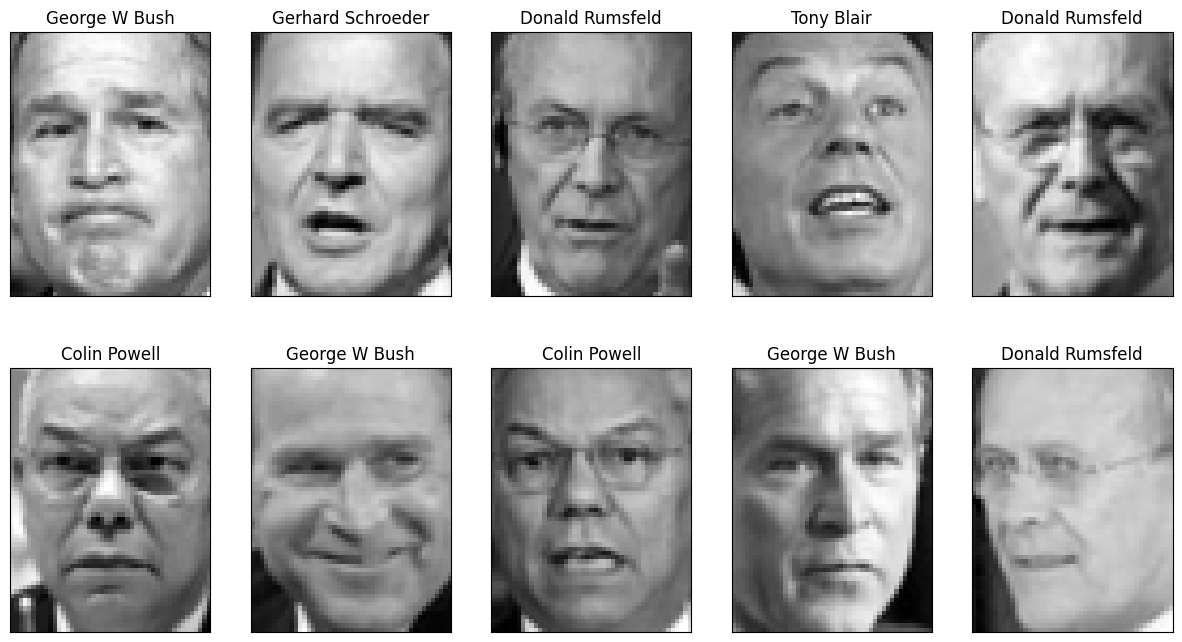

In [22]:
# Visualize some sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(target_names[y[i]])
plt.show()

#### Step 4: Standardize the Data

In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Step 5: Apply PCA

In [24]:
# Display the shape of the dataset
print(f'Dataset shape: {X.shape}')
print(f'Number of classes: {len(target_names)}')

Dataset shape: (1140, 2914)
Number of classes: 5


In [25]:
# Apply PCA
pca = PCA(n_components=1100, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [26]:
# Display the shape of the transformed data
print(f'Shape of PCA transformed data: {X_pca.shape}')

Shape of PCA transformed data: (1140, 1100)


#### Step 6: Visualize Explained Variance

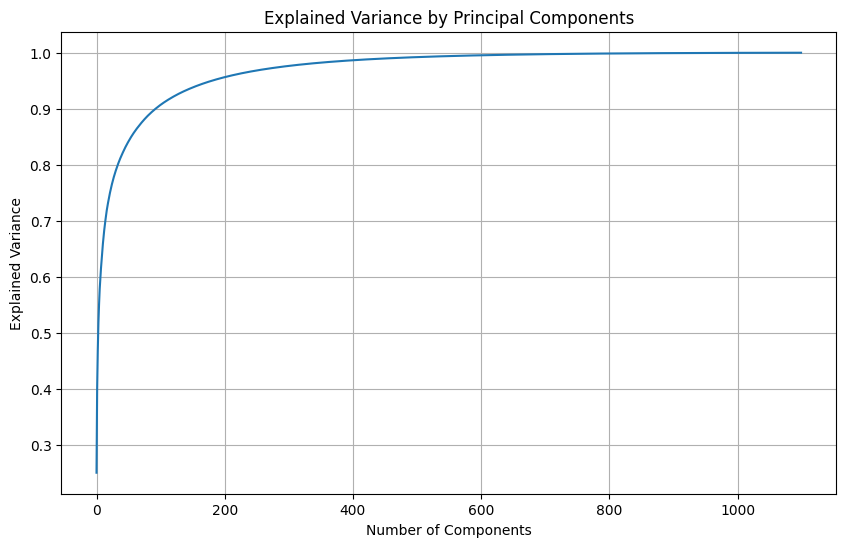

In [27]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

#### Step 7: Visualize Eigenfaces

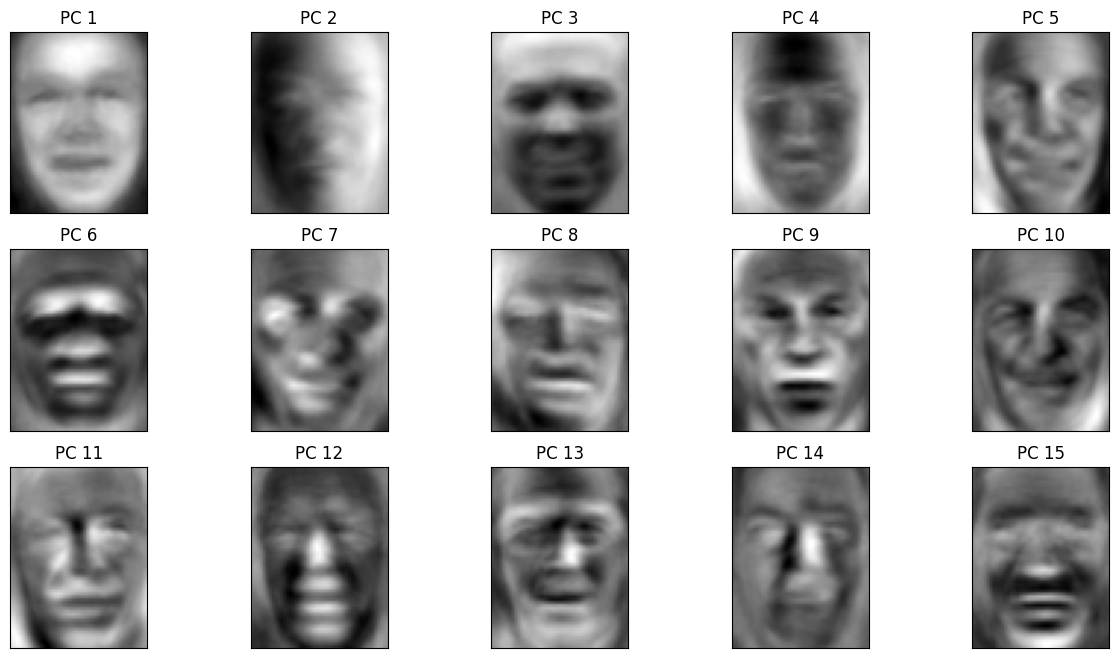

In [28]:
# Visualize the eigenfaces
eigenfaces = pca.components_.reshape((pca.n_components_, lfw_dataset.images.shape[1], lfw_dataset.images.shape[2]))

fig, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f'PC {i+1}')
plt.show()

#### Step 8: Split the Data and Train a Classifier

In [14]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

In [15]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [17]:
# Evaluate the model
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

                   precision    recall  f1-score   support

     Colin Powell       0.50      0.02      0.03        64
  Donald Rumsfeld       0.00      0.00      0.00        32
    George W Bush       0.45      0.99      0.62       127
Gerhard Schroeder       0.00      0.00      0.00        29
       Tony Blair       0.00      0.00      0.00        33

         accuracy                           0.45       285
        macro avg       0.19      0.20      0.13       285
     weighted avg       0.31      0.45      0.28       285

Accuracy: 0.4456140350877193


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')

                   precision    recall  f1-score   support

     Colin Powell       0.51      0.42      0.46        64
  Donald Rumsfeld       0.44      0.38      0.41        32
    George W Bush       0.60      0.66      0.63       127
Gerhard Schroeder       0.22      0.17      0.19        29
       Tony Blair       0.23      0.30      0.26        33

         accuracy                           0.48       285
        macro avg       0.40      0.39      0.39       285
     weighted avg       0.48      0.48      0.48       285

Accuracy: 0.4842105263157895
